In [13]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


К частям таблицы можно обращаться так же, как и к матрицам.

HairEyeColor - таблица с данными, встроенными в R. Посмотрите на неё в R. Команда dimnames(HairEyeColor) позволит нам посмотреть, какие измерения есть в этой таблице и как они называются. Например, чтобы обратиться к части таблицы, в которой хранятся данные только о мужчинах, нам нужно выполнить следующую команду: 
```
HairEyeColor[ , ,'Male']
```
Ваша задача в переменную red_men сохранить долю рыжеволосых (Red) от общего числа голубоглазых мужчин.

Обратите внимание, что нужны не проценты, а просто доля, то есть десятичная дробь  (например, не 10%, а 0.1).

In [14]:
%%R 
print(str(HairEyeColor))

 'table' num [1:4, 1:4, 1:2] 32 53 10 3 11 50 10 30 10 25 ...
 - attr(*, "dimnames")=List of 3
  ..$ Hair: chr [1:4] "Black" "Brown" "Red" "Blond"
  ..$ Eye : chr [1:4] "Brown" "Blue" "Hazel" "Green"
  ..$ Sex : chr [1:2] "Male" "Female"
NULL


In [15]:
%%R 
dimnames(HairEyeColor)

$Hair
[1] "Black" "Brown" "Red"   "Blond"

$Eye
[1] "Brown" "Blue"  "Hazel" "Green"

$Sex
[1] "Male"   "Female"



In [16]:
%%R
red_men <- prop.table(HairEyeColor[ , "Blue",  "Male"])["Red"]
red_men

      Red 
0.0990099 


С таблицами, как и с матрицами, можно совершать разные арифметические операции, например, суммировать все элементы таблицы.

Напишите число зеленоглазых женщин в наборе данных HairEyeColor.

In [17]:
%%R 
sum(HairEyeColor[, "Green", "Female"])

[1] 31


Постройте столбчатую диаграмму распределения цвета глаз по цвету волос только у женщин из
таблицы HairEyeColor. По оси X должен идти цвет волос, цвет столбиков должен отражать цвет глаз. По оси Y - количество наблюдений.

Чтобы построить столбчатую диаграмму в ggplot, вам нужно подключить нужный пакет, затем преобразовать таблицу HairEyeColor в data frame:

mydata <- as.data.frame(HairEyeColor)

Постройте график на основе предложенного кода, сохранив его в переменную obj.
Укажите, чему равен аргумент data, что должно находиться в aes(). Изучите справку по geom_bar(), чтобы узнать, чему должен равняться аргумент position для отображения цвета глаз в виде соседних столбиков, также вам может быть полезна эта памятка. Там же вы найдёте ответ на вопрос, за что отвечает аргумент stat. С помощью scale_fill_manual мы говорим графику, что мы хотим, чтобы он использовал указанные нами цвета.
Дополните предложенный код:
```
library("ggplot2")
mydata <- as.data.frame(HairEyeColor)
obj <- ggplot(data = , aes(x = , y = Freq)) + 
geom_bar(stat="identity", position = ) + 
scale_fill_manual(values=c("Brown", "Blue", "Darkgrey", "Darkgreen"))
```
У себя на компьютере вы можете визуализировать полученный график, исполнив 'obj'. В случае, если все сделано правильно, он будет выглядеть так (обратите внимание на название осей и легенды):

Прежде чем отправить код на проверку, выполните его на своем компьютере, чтобы избежать лишних ошибок.
При ошибке, обратите внимание на содержание feedback.

![](https://ucarecdn.com/9e39e35f-4a35-44fe-8d75-7e0639ce54b9/)

In [0]:
%%R
library("ggplot2")

In [0]:
%%R 
mydata <- as.data.frame(HairEyeColor[ , , "Female"])
mydata$Freq <- factor(mydata$Freq)


In [20]:
%%R
str(mydata)

'data.frame':	16 obs. of  3 variables:
 $ Hair: Factor w/ 4 levels "Black","Brown",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Eye : Factor w/ 4 levels "Brown","Blue",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Freq: Factor w/ 13 levels "2","4","5","7",..: 11 13 8 2 6 10 4 12 3 9 ...


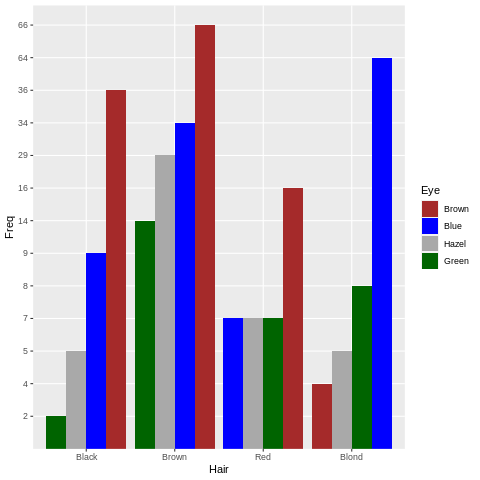

In [21]:
%%R
ggplot(data=mydata, aes(x=Hair, y=Freq, fill=Eye))+
    geom_bar(stat="identity", position="dodge") +
    scale_fill_manual(values=c("Brown", "Blue", "Darkgrey", "Darkgreen"))

На основе таблицы HairEyeColor создайте ещё одну таблицу, в которой хранится информация о распределении цвета глаз у женщин-шатенок (Hair = 'Brown'). Проведите тест равномерности распределения цвета глаз у шатенок и выведите значение хи-квадрата для этого теста.

In [22]:
%%R 
mydata <- as.data.frame(HairEyeColor[ "Brown", , "Female"])
mydata

      HairEyeColor["Brown", , "Female"]
Brown                                66
Blue                                 34
Hazel                                29
Green                                14


In [23]:
%%R
chisq.test(mydata)


	Chi-squared test for given probabilities

data:  mydata
X-squared = 40.189, df = 3, p-value = 9.717e-09



Воспользуемся данными diamonds из библиотеки ggplot2. При помощи критерия Хи - квадрат проверьте гипотезу о взаимосвязи качества огранки бриллианта (сut) и его цвета (color). В переменную main_stat сохраните значение статистики критерия Хи - квадрат. Обратите внимание, main_stat должен быть вектором из одного элемента, а не списком (листом).

Данные diamonds уже доступны для работы!

In [0]:
%%R 
mydata <- table(diamonds[c("cut", "color")])
main_stat <- unlist(chisq.test(mydata)[1])

Опять воспользуемся данными diamonds из библиотеки ggplot2. При помощи критерия Хи - квадрат проверьте гипотезу о взаимосвязи цены (price) и каратов (carat) бриллиантов. Для этого сначала нужно перевести эти количественные переменные в формат пригодный для Хи - квадрат. Создайте две новые переменные в данных diamonds:

factor_price - где будет 1, если значение цены больше либо равно чем среднее, и 0, если значение цены ниже среднего цены по выборке.

factor_carat - где будет 1, если число карат больше либо равно чем среднее,  и 0, если ниже среднего числа карат по выборке.

Важный момент - на больших данных цикл for() работает довольно медленно, постарайтесь решить эту задачу без его использования!

Используя эти шкалы при помощи Хи - квадрат проверьте исходную гипотезу. Сохраните в переменную main_stat значение критерия  Хи - квадрат.

Пример перевода количественной шкалы в номинативную:

```
> x <- (1, 2, 3, 5, 6, 7) # mean(x) = 4
> factor_x <- (0, 0, 0, 1, 1, 1)
```

In [25]:
%%R
diamonds$factor_price <- ifelse (diamonds$price >= mean(diamonds$price), 1, 0)
diamonds$factor_carat <- ifelse (diamonds$carat >= mean(diamonds$carat), 1, 0)

mytable <- table(diamonds$factor_price, diamonds$factor_carat)
main_stat <- chisq.test(mytable)[1]
main_stat

$statistic
X-squared 
 40735.22 



При помощи точного критерия Фишера проверьте гипотезу о взаимосвязи типа коробки передач (am) и типа двигателя (vs) в данных mtcars. Результат выполнения критерия сохраните в переменную.Получившийся p - уровень значимости сохраните в переменную fisher_test.

In [26]:
%%R
fisher_test <- fisher.test(mtcars$am, mtcars$vs)[1]
fisher_test

$p.value
[1] 0.4726974

